In [447]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings(action='ignore')
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [448]:
shop=pd.read_csv('../csv-data/online_shoppers_intention.csv')
shop

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## online_shoppers_intention.csv
https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset




Administrative : 사용자가 방문한 이 유형(관리)의 페이지 수입니다.

Informational_Duration : 이 카테고리의 페이지에서 보낸 시간

ProductRelated : 사용자가 방문한 이 유형(제품 관련)의 페이지 수

ProductRelated_Duration : 이 카테고리의 페이지에서 보낸 시간

BounceRates : 해당 페이지를 통해 웹사이트에 들어갔다가 추가 작업을 실행하지 않고 나가는 방문자의 비율

ExitRates : 특정 페이지에서 끝나는 웹사이트의 페이지뷰 비율

PageValues : 대상 페이지 값 및/또는 전자 상거래 완료에 대해 평균을 낸 페이지의 평균 값

SpecialDay : 이 값은 거래가 완료될 가능성이 더 높은 특별한 날 또는 휴일(예: 어머니날 또는 발렌타인 데이)에 대한 검색 날짜의 근접성

Month : 페이지뷰가 발생한 월을 문자열 형식으로 포함

OperatingSystems : 사용자가 페이지를 볼 때 사용했던 운영 체제를 나타내는 정수 값

Browser : 사용자가 페이지를 보기 위해 사용한 브라우저를 나타내는 정수 값

Region : 사용자가 위치한 지역을 나타내는 정수 값

TrafficType : 사용자가 분류되는 트래픽 유형을 나타내는 정수 값

VisitorType : 방문자가 신규 방문자인지, 재방문자인지 또는 기타인지를 나타내는 문자열 
==> 0:Returning_Visitor(재방문자)   1:New_Visitor(새 방문자)   2: other (그 외)

Weekend : 세션이 주말인지 여부를 나타내는 bool          ==> 0:False(주말아님)   1:True(주말)

Revenue : 사용자가 구매를 완료했는지 여부를 나타내는 bool    ==> 0:False(구매안함)   1:True(구매!)



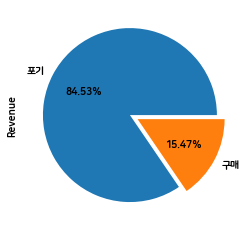

In [449]:
#구매한사람과 안한사람
shop['Revenue'].value_counts().plot.pie(explode=[0,0.1], labels=['포기','구매'],
                                             autopct='%1.2f%%')

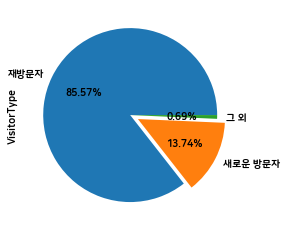

In [450]:
shop['VisitorType'].value_counts().plot.pie(explode=[0,0.1,0], labels=['재방문자','새로운 방문자', "그 외"],
                                             autopct='%1.2f%%')

#재방문자비율이 굉장히 높다. 

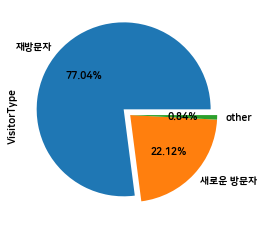

In [451]:
# 구매한사람들중에 재방문자의 비율?
a=shop[shop['Revenue']==1]
a['VisitorType'].value_counts().plot.pie(explode=[0.1,0,0], labels=['재방문자','새로운 방문자','other'],
                                             autopct='%1.2f%%')


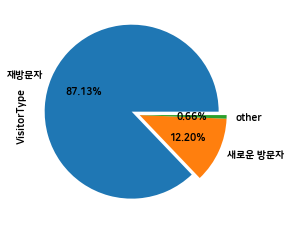

In [452]:
# 구매 안한사람들중에 재방문자의 비율?
a=shop[shop['Revenue']==0]
a['VisitorType'].value_counts().plot.pie(explode=[0.1,0,0], labels=['재방문자','새로운 방문자','other'],
                                             autopct='%1.2f%%')


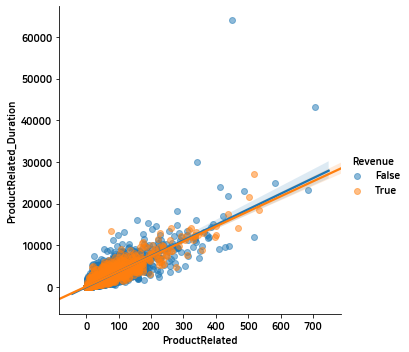

In [453]:
sns.lmplot(x="ProductRelated", y="ProductRelated_Duration", 
           hue='Revenue', data=shop, scatter_kws={'alpha':0.5})
plt.show()

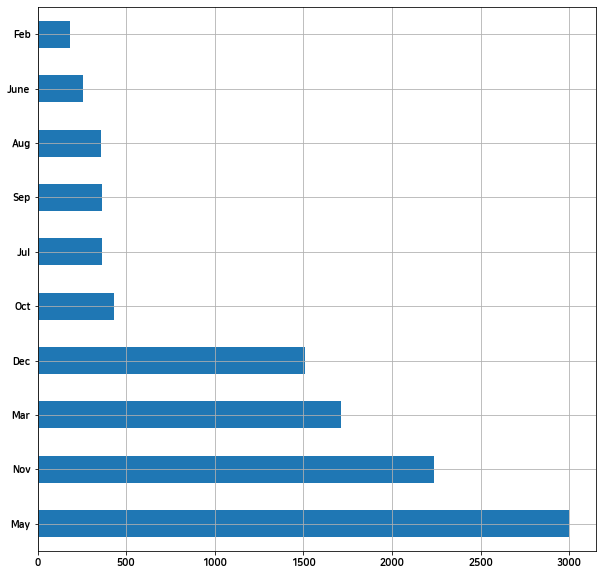

In [454]:
#구매한달의 비율

a['Month'].value_counts().plot(kind='barh', grid=True, figsize=(10,10))

In [455]:
def convert(x):
    if x == False:
        return 0
    else: 
        return 1

In [456]:
shop['Revenue'] = shop['Revenue'].apply(convert)
shop['Weekend'] = shop['Weekend'].apply(convert)

In [457]:
def convert1(x):
    if x == "Returning_Visitor":
        return 0
    elif x == "New_Visitor":
        return 1
    else: 
        return 2

In [458]:
s_corr=shop.corr()
s_corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [459]:
shop['VisitorType'] = shop['VisitorType'].apply(convert1)

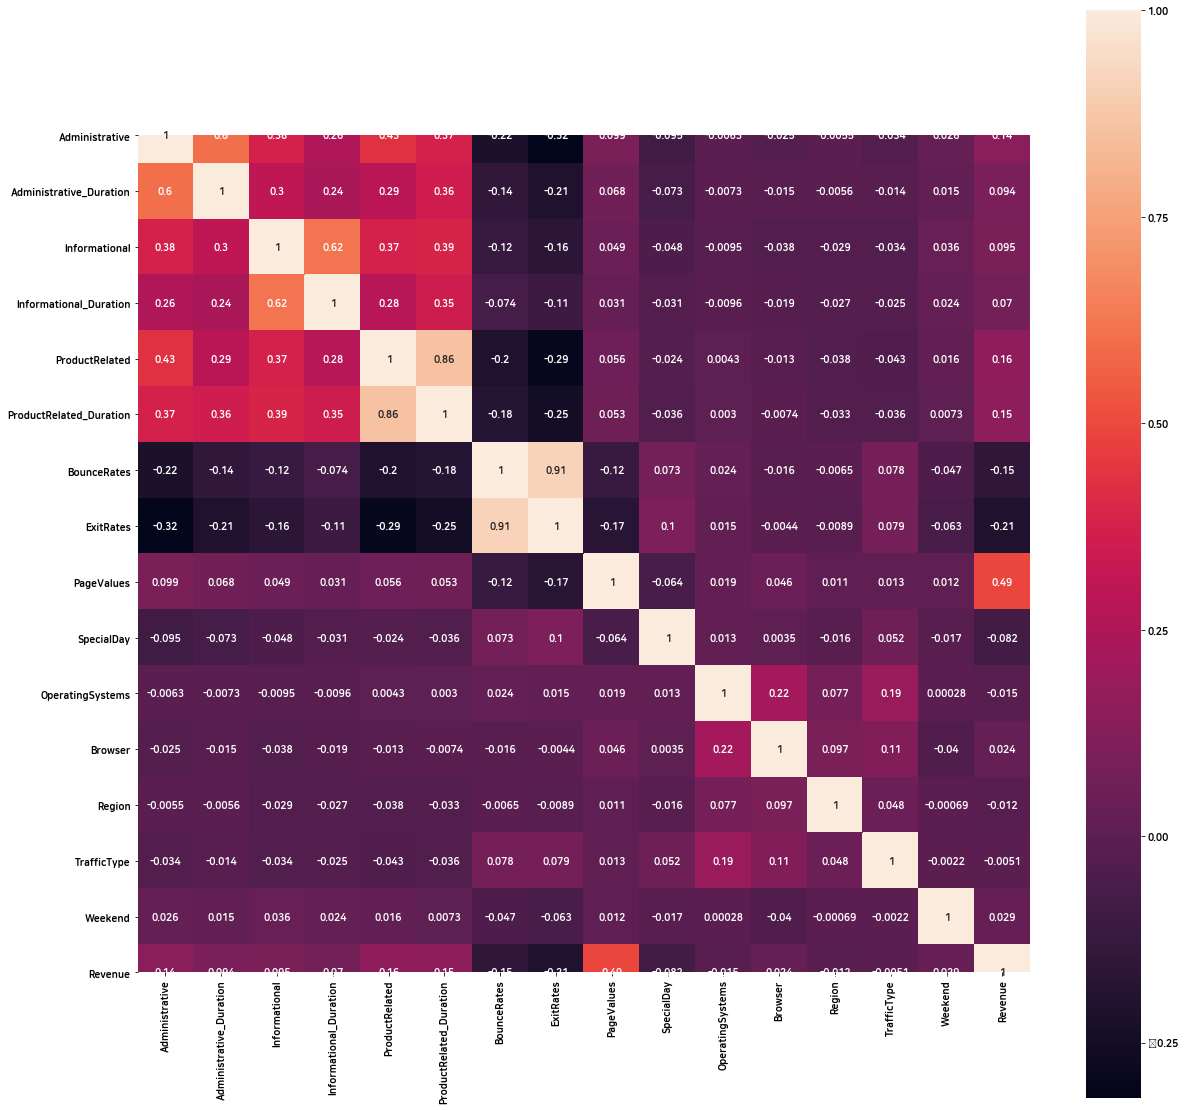

In [460]:
plt.figure(figsize=(20, 20))
sns.heatmap(s_corr,  square=True,
            annot=True, linecolor="white")
plt.show()

## insight
Revenue(구매완료), PageValues(페이지값)은 높은 상관계수를 보인다. 

PageValues = 전자상거래 수익 + 총 목표값 / 특정 페이지의 순 페이지뷰 수   

PageValues가 0 >> 전자상거래를 하지 않은 것 ... 높을수록 전자상거래빈도가 잦음. 


Administrative~ ProductRealated는 서로 영향을 주고받는 듯

In [461]:
shop.drop(columns=[

'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ExitRates', 'OperatingSystems','Browser', 'Region', 'TrafficType', 'Month'], inplace=True)
shop

## 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration' 는 ... Revenue의 결과를 결정하는데 크게 영향을 주지않아 제외.

,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,VisitorType,Weekend,Revenue
0,1,0.000000,0.200000,0.000000,0.0,0,0,0
1,2,64.000000,0.000000,0.000000,0.0,0,0,0
2,1,0.000000,0.200000,0.000000,0.0,0,0,0
3,2,2.666667,0.050000,0.000000,0.0,0,0,0
4,10,627.500000,0.020000,0.000000,0.0,0,1,0
...,...,...,...,...,...,...,...,...
12325,53,1783.791667,0.007143,12.241717,0.0,0,1,0
12326,5,465.750000,0.000000,0.000000,0.0,0,1,0
12327,6,184.250000,0.083333,0.000000,0.0,0,1,0
12328,15,346.000000,0.000000,0.000000,0.0,0,0,0


In [462]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
VisitorType                12330 non-null int64
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtypes: float64(4), int64(4)
memory usage: 770.8 KB


In [463]:
from sklearn.model_selection import train_test_split

In [464]:
df_data= shop.copy()
df_data

,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,VisitorType,Weekend,Revenue
0,1,0.000000,0.200000,0.000000,0.0,0,0,0
1,2,64.000000,0.000000,0.000000,0.0,0,0,0
2,1,0.000000,0.200000,0.000000,0.0,0,0,0
3,2,2.666667,0.050000,0.000000,0.0,0,0,0
4,10,627.500000,0.020000,0.000000,0.0,0,1,0
...,...,...,...,...,...,...,...,...
12325,53,1783.791667,0.007143,12.241717,0.0,0,1,0
12326,5,465.750000,0.000000,0.000000,0.0,0,1,0
12327,6,184.250000,0.083333,0.000000,0.0,0,1,0
12328,15,346.000000,0.000000,0.000000,0.0,0,0,0


In [465]:
exam= df_data.drop(columns="Revenue")
exam

,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,VisitorType,Weekend
0,1,0.000000,0.200000,0.000000,0.0,0,0
1,2,64.000000,0.000000,0.000000,0.0,0,0
2,1,0.000000,0.200000,0.000000,0.0,0,0
3,2,2.666667,0.050000,0.000000,0.0,0,0
4,10,627.500000,0.020000,0.000000,0.0,0,1
...,...,...,...,...,...,...,...
12325,53,1783.791667,0.007143,12.241717,0.0,0,1
12326,5,465.750000,0.000000,0.000000,0.0,0,1
12327,6,184.250000,0.083333,0.000000,0.0,0,1
12328,15,346.000000,0.000000,0.000000,0.0,0,0


In [466]:
target= shop['Revenue']

In [467]:
#X_train, X_test, y_train, y_test
train_exam, test_exam, train_target, test_target = train_test_split(exam, 
                                                                    target,
                                                                    test_size=0.2, #검증비율 20% 훈련비율 80%
                                                                    random_state=100 #seed 값
                                                                   )
#훈련문제, 검증문제, 훈련답, 검증답

In [468]:
train_target.count()
test_target.count()

2466

In [469]:
train_exam.head()

,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,VisitorType,Weekend
8088,71,3534.298611,0.008904,0.0,0.0,0,0
8995,11,417.989286,0.016667,0.0,0.0,0,0
11372,2,63.500000,0.000000,0.0,0.0,0,0
325,4,54.000000,0.000000,0.0,0.0,0,0
9947,39,1020.013889,0.005405,0.0,0.0,0,1


In [470]:
train_exam.reset_index(inplace=True) #인덱스 정돈
test_exam.reset_index(inplace=True) #인덱스 정돈

In [471]:
train_exam
del train_exam['index']

In [472]:
del test_exam['index']

In [473]:
test_exam

,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,VisitorType,Weekend
0,1,0.000000,0.200000,0.000000,0.0,0,0
1,12,499.000000,0.000000,86.388000,0.0,1,1
2,16,519.750000,0.012500,0.000000,0.0,0,0
3,439,21857.046480,0.003589,11.439233,0.0,0,0
4,28,912.434848,0.000000,0.000000,0.0,0,1
...,...,...,...,...,...,...,...
2461,43,674.533333,0.000000,45.633454,0.0,1,0
2462,2,338.000000,0.000000,112.414127,0.0,0,0
2463,9,348.540000,0.000000,16.172289,0.0,0,0
2464,71,1145.571429,0.000000,80.587338,0.0,0,0


In [474]:
test_target=test_target.reset_index() 
train_target=train_target.reset_index()

In [475]:
test_target

,index,Revenue
0,2520,0
1,2412,1
2,762,0
3,5916,0
4,10524,0
...,...,...
2461,6521,1
2462,6799,1
2463,6563,1
2464,3628,0


In [476]:
train_target.drop(columns='index', inplace=True)
test_target.drop(columns=['index'], inplace=True)

In [477]:
train_target

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
9859,0
9860,0
9861,0
9862,0


In [478]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [479]:
depth=list(range(1,10))

depth_result=[]

In [480]:
for i in depth:
    tree_clf=DecisionTreeClassifier(max_depth=i, 
                                random_state=42
                                   )
    tree_clf.fit(train_exam, train_target)
    tree_clf.score(train_exam,train_target)
    com_target=tree_clf.predict(test_exam)
    depth_result.append(accuracy_score(test_target, com_target))
    

In [481]:
tree_clf.feature_importances_

# 'ProductRelated' : 0.05817947
# 'ProductRelated_Duration' : 0.07946921
# 'BounceRates' : 0.10951678
# 'PageValues' : 0.7253978 ======> 제일 영향이 높음
# 'SpecialDay' :  0.0070853 
# 'VisitorType' : 0.01322256
# 'Weekend' : 0.00712888


array([0.05817947, 0.07946921, 0.10951678, 0.7253978 , 0.0070853 ,
       0.01322256, 0.00712888])

In [482]:
depth_result

[0.8673965936739659,
 0.8852392538523925,
 0.8856447688564477,
 0.883617193836172,
 0.8864557988645579,
 0.8844282238442822,
 0.8848337388483374,
 0.8824006488240065,
 0.8803730738037308]

In [483]:
ran=list(range(1,100))
ran_result=[]

<BarContainer object of 9 artists>

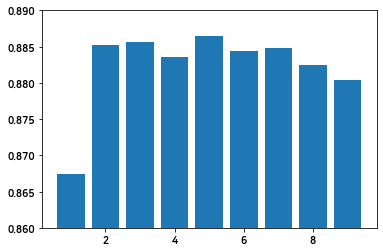

In [484]:
plt.ylim([0.86, 0.89])  
plt.bar(depth, depth_result)
#max_depth=4 일때 가장 높다.

In [485]:
me=[1,0,0.2,0.2,77,0,1,1]
you=[0,36,2111.341667,2,0,1,0]

In [486]:
train_exam.columns

Index(['ProductRelated', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'VisitorType', 'Weekend'],
      dtype='object')

In [487]:
def func_r(r):
    if r[0][1]>r[0][0]:
        print("샀을 가능성이 더 크다.")
        print("가능성 지수 :",r[0][1]*100,"%")
    else:
        print("안 샀을 가능성이 더 크다.")
        print("가능성 지수 :",r[0][0]*100,"%" )

In [488]:
result=tree_clf.predict_proba([you])
func_r(result)

샀을 가능성이 더 크다.
가능성 지수 : 100.0 %
